In [23]:
# Step 1 : import library
import pandas as pd

In [24]:
# Step 2 : import data
admission = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv')

In [25]:
admission.head()


,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [27]:
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [28]:
admission.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
# Step 3 : define target (y) and features (X)
y = admission['Chance of Admit ']
X = admission.drop(['Serial No','Chance of Admit '],axis=1)

In [30]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [31]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

In [32]:
# Step 5 : select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [34]:
# Step 7 : predict model
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0.71426327, 0.72534136, 0.69677103, 0.66566584, 0.57483872,
       0.93087527, 0.93701113, 0.72361387, 0.81130158, 0.62223963,
       0.59629648, 0.80084072, 0.52537944, 0.79174558, 0.84064992,
       0.66429594, 0.65136589, 0.66990687, 0.75794085, 0.86072023,
       0.66088101, 0.85570763, 0.84777425, 0.95033179, 0.68750762,
       0.65907671, 0.65279623, 0.5709259 , 0.55895645, 0.57990205,
       0.54497918, 0.7570717 , 0.69682571, 0.77286067, 0.64320811,
       0.5183554 , 0.43816818, 0.84654064, 0.90398354, 0.80517781,
       0.72218971, 0.72882587, 0.68145136, 0.88592237, 0.77208852,
       0.78778085, 0.95526121, 0.88586486, 0.59980416, 0.50690214,
       0.59947098, 0.63380406, 0.82841217, 0.44911724, 0.71068577,
       0.77335748, 0.68851557, 0.64486026, 0.85537724, 0.65517768,
       0.65046031, 0.90818978, 0.63422429, 0.68658606, 0.72150268,
       0.69030545, 0.59381287, 0.93813035, 0.58997351, 0.91542587,
       0.59283415, 0.93351713, 0.59478751, 0.71380389, 0.54346

In [36]:
# Step 8 : model accuracy
from sklearn.metrics import mean_absolute_percentage_error

In [37]:
mean_absolute_percentage_error(y_test,y_pred)

0.07575278864605438

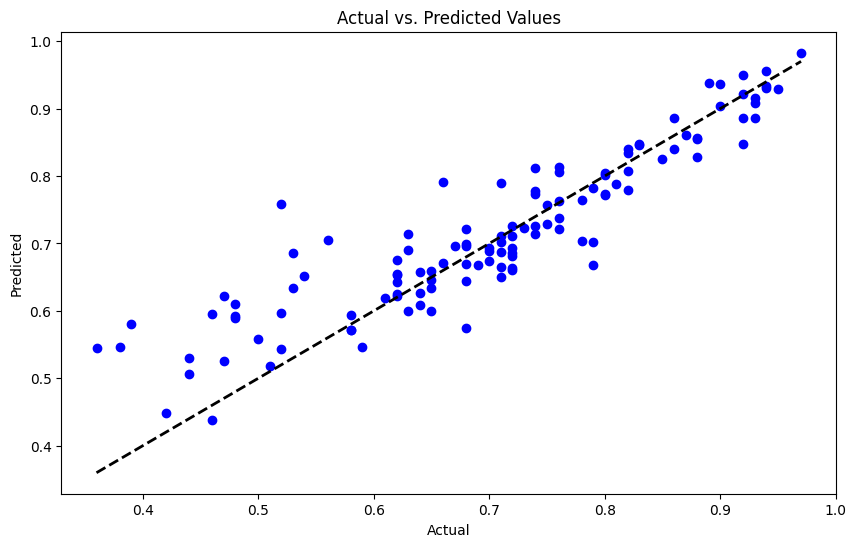

In [42]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()
